In [5]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_path = r"/home/jori152b/DIR/horse/jori152b-medinf/KP_MedInf/model_development/data"

In [11]:
# xgb_results = np.load(os.path.join(data_path, 'models/aki_stage_X_extended_6H.csv_20240915142850/results.npy'), allow_pickle=True)
# load as dict
xgb_results = np.load(os.path.join(data_path, 'models/aki_stage_X_extended_6H.csv_20240915142850/results.npy'), allow_pickle=True).item()

In [ ]:
print(xgb_results['aki_stage_X_extended_6H.csv']['average_scores'])

In [ ]:
stats = df.describe()
print(stats)    
# save to csv
stats.to_csv('data/analysis/data_preprocessed_extended_stats.csv', index=False)

In [ ]:
# Initialize a dictionary to store results
results = {}

# List of columns to analyze (excluding the datetime and other non-measurement columns)
columns_to_analyze = df.columns.difference(['icustay_id', 'charttime', 'hadm_id', 'subject_id'])

# Group by icustay_id
grouped = df.groupby('icustay_id')

# Iterate through each column to analyze
for column in columns_to_analyze:
    frequencies = []
    mean_time_diffs = []
    std_time_diffs = []
    max_time_diffs = []
    min_time_diffs = []

    # Iterate through each group (each icustay_id)
    for icustay_id, group in grouped:
        valid_rows = group[group[column].notna()]

        frequency = valid_rows.shape[0]
        if frequency > 1:
            time_diffs = valid_rows['charttime'].diff().dropna().dt.total_seconds() / 60  # in minutes

            mean_time_diff = time_diffs.mean()
            std_time_diff = time_diffs.std()
            max_time_diff = time_diffs.max()
            min_time_diff = time_diffs.min()
        else:
            mean_time_diff = std_time_diff = max_time_diff = min_time_diff = None

        frequencies.append(frequency)
        mean_time_diffs.append(mean_time_diff)
        std_time_diffs.append(std_time_diff)
        max_time_diffs.append(max_time_diff)
        min_time_diffs.append(min_time_diff)

    # Aggregate the statistics across all icustay_id groups
    overall_frequency = sum(frequencies)
    overall_mean_time_diff = pd.Series(mean_time_diffs).mean()
    overall_std_time_diff = pd.Series(std_time_diffs).mean()
    overall_max_time_diff = pd.Series(max_time_diffs).max()
    overall_min_time_diff = pd.Series(min_time_diffs).min()

    results[column] = {
        'frequency': overall_frequency,
        'mean_time_diff': overall_mean_time_diff,
        'std_time_diff': overall_std_time_diff,
        'max_time_diff': overall_max_time_diff,
        'min_time_diff': overall_min_time_diff
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

# Optionally, save the results to a CSV file
results_df.to_csv('../data/analysis/measurement_statistics_by_icustay.csv')


In [ ]:
# drop all the columns in string format
X.drop(['first_hosp_stay'], axis=1, inplace = True)
X.drop(['first_icu_stay'], axis=1, inplace = True)
X.drop(['ethnicity'], axis=1, inplace = True)
X.drop(['admittime'], axis=1, inplace = True)
X.drop(['dischtime'], axis=1, inplace = True)
X.drop(['intime'], axis=1, inplace = True)
X.drop(['outtime'], axis=1, inplace = True)
X.drop(['dod'], axis=1, inplace = True)
X.drop(['charttime'], axis=1, inplace = True)


In [ ]:
X_original = pd.read_csv(os.path.join(data_path, 'preprocessed/X_original.csv'), sep=',')
X_original.drop(['charttime', 'hadm_id', 'icustay_id'], axis=1, inplace=True)
# remove all "_mean" from the column names if there is any
X_original.columns = X_original.columns.str.replace('_mean', '')
print(X_original.columns)

X_extended = pd.read_csv(os.path.join(data_path, 'preprocessed/X_extended.csv'), sep=',')
X_extended.drop(['charttime', 'hadm_id', 'icustay_id'], axis=1, inplace=True)
# remove all "_mean" from the column names if there is any
X_extended.columns = X_extended.columns.str.replace('_mean', '')
print(X_extended.columns)



In [ ]:
print('difference between original and extended: ', set(X_original.columns) - set(X_extended.columns))
print('difference between extended and original: ', set(X_extended.columns) - set(X_original.columns))
new_attributes = list(set(X_extended.columns) - set(X_original.columns))
print('new attributes: ', new_attributes)


In [ ]:
import matplotlib.pyplot as plt

# Attributes only in X_original (ethnicity groupings)
original_only_attributes = [
    'ethnicity_grouped_white', 'ethnicity_grouped_unknown', 'ethnicity_grouped_native',
    'ethnicity_grouped_black', 'ethnicity_grouped_hispanic', 'ethnicity_grouped_other',
    'ethnicity_grouped_asian'
]

# Create a copy of X_original with only these attributes and aki_stage
X_original_subset = X_original[original_only_attributes + ['aki_stage']].copy()

# Rename the columns
new_column_names = {
    'ethnicity_grouped_white': 'White',
    'ethnicity_grouped_unknown': 'Unknown',
    'ethnicity_grouped_native': 'Native',
    'ethnicity_grouped_black': 'Black',
    'ethnicity_grouped_hispanic': 'Hispanic',
    'ethnicity_grouped_other': 'Other',
    'ethnicity_grouped_asian': 'Asian'
}
X_original_subset.rename(columns=new_column_names, inplace=True)

# Calculate correlations
correlations = X_original_subset.corr()['aki_stage'].drop('aki_stage').sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(20,10))
correlations.plot(kind='bar', color='grey')
plt.title('Correlation of Ethnicity with AKI Stage', fontsize=20)
plt.ylabel('Correlation', fontsize=16)
plt.xlabel('Ethnicity', fontsize=16)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=19)

# Adjust layout to prevent cutoff of labels
plt.tight_layout()

# Add some padding at the bottom for the rotated labels
plt.subplots_adjust(bottom=0.2)

plt.show()

In [ ]:
new_attributes = list(set(X_extended.columns) - set(X_original.columns))

print(X_extended.columns)
X = X_extended.copy()[new_attributes + ['aki_stage']]
# take only the new attributes
# # Calculate correlations
correlations = X.corr()['aki_stage'].drop('aki_stage').sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(20,10))
correlations.plot(kind='bar', color='grey')
plt.title('Correlation of all features with the target variable')
plt.ylabel('Correlation')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutoff of labels
plt.tight_layout()

plt.show()

In [ ]:
# Dictionary to map old names to new names
name_mapping = {
    'albumin': 'Albumin',
    'lactate': 'Lactate',
    'bands': 'Immature WBCs',
    'height_first': 'Initial Height',
    'inr_max': 'Maximum INR',
    'platelet': 'Platelet Count',
    'bilirubin': 'Bilirubin',
    'ptt': 'Partial Thromboplastin Time',
    'inr': 'INR',
    'weight_first': 'Initial Weight',
    'phosphate': 'Phosphate',
    'uric_acid': 'Uric Acid',
    'pt': 'Prothrombin Time',
    'calcium': 'Calcium'
}

# Create a copy of X_extended
X_renamed = X_extended.copy()

# Rename the columns
X_renamed.rename(columns=name_mapping, inplace=True)

# Update the new_attributes list with the renamed columns
new_attributes_renamed = [name_mapping.get(attr, attr) for attr in new_attributes]

# Use the renamed DataFrame and attribute list for further processing
X = X_renamed[new_attributes_renamed + ['aki_stage']]

# Calculate correlations
correlations = X.corr()['aki_stage'].drop('aki_stage').sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(20,10))
correlations.plot(kind='bar', color='grey')
plt.title('Correlation of New Features with AKI Stage')
plt.ylabel('Correlation')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=19)

# Adjust layout to prevent cutoff of labels
plt.tight_layout()

plt.show()

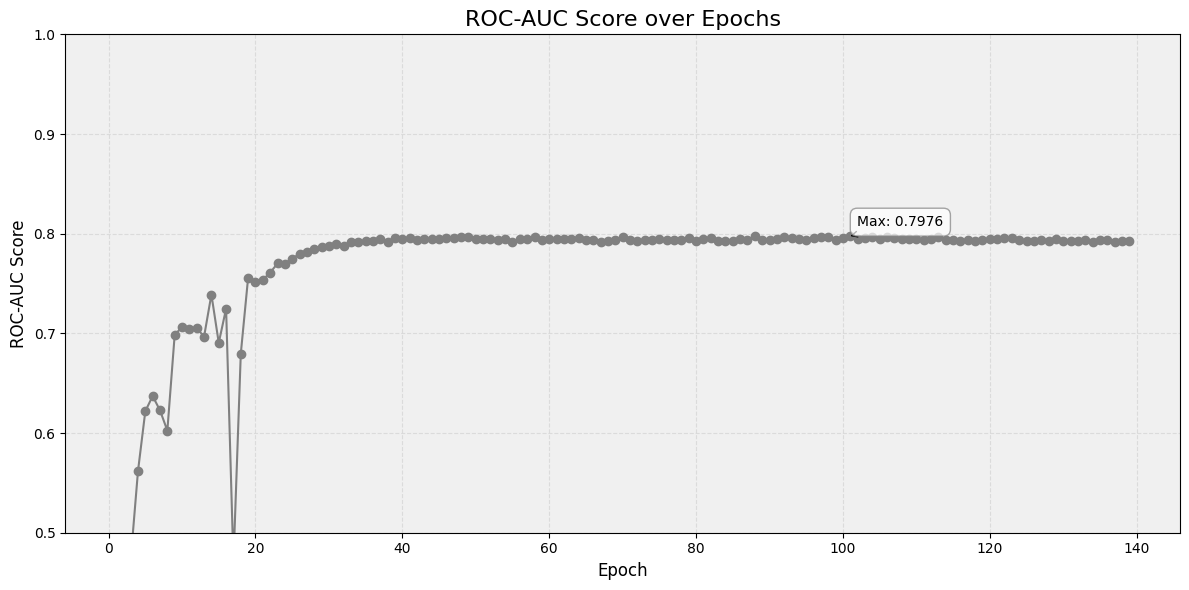

In [1]:
import matplotlib.pyplot as plt
import io
import pandas as pd

# Read the data
data = io.StringIO('''Wall time,Step,Value
1726611154.1907468,1,0.48942995071411133
1726611168.0200346,2,0.4831121861934662
1726611181.7748046,3,0.4723912179470062
1726611195.6826062,4,0.5617185235023499
1726611209.496848,5,0.6219428181648254
1726611223.5211842,6,0.637091875076294
1726611237.473927,7,0.6227255463600159
1726611251.2156625,8,0.6024358868598938
1726611264.9988372,9,0.6985788345336914
1726611278.7884977,10,0.7062839269638062
1726611292.6597588,11,0.7047967910766602
1726611306.4656022,12,0.705322802066803
1726611320.3491018,13,0.6966632008552551
1726611334.3507004,14,0.7389539480209351
1726611348.0207343,15,0.6905033588409424
1726611361.692612,16,0.7248113751411438
1726611375.363898,17,0.4700547456741333
1726611389.118693,18,0.6795607209205627
1726611402.9079473,19,0.7559885382652283
1726611416.8922083,20,0.7511568069458008
1726611430.8844793,21,0.753729522228241
1726611444.617564,22,0.7609685063362122
1726611458.3777843,23,0.770111083984375
1726611472.1412404,24,0.7699913382530212
1726611486.040124,25,0.774629533290863
1726611499.856158,26,0.7799899578094482
1726611513.8393853,27,0.78179931640625
1726611527.9388926,28,0.7846986055374146
1726611541.724514,29,0.7863301634788513
1726611555.4503207,30,0.7875235676765442
1726611569.1674418,31,0.7897922992706299
1726611582.993432,32,0.787426769733429
1726611596.7078955,33,0.791665256023407
1726611610.7651756,34,0.7919102311134338
1726611624.6697047,35,0.7929350733757019
1726611638.3801544,36,0.7931088209152222
1726611652.0960035,37,0.7944268584251404
1726611665.8266587,38,0.7917441129684448
1726611679.6980727,39,0.7955214977264404
1726611693.4773686,40,0.7949450612068176
1726611707.4063783,41,0.7952587008476257
1726611721.468096,42,0.7934990525245667
1726611735.254364,43,0.7942363023757935
1726611748.9786289,44,0.7947520017623901
1726611762.7720578,45,0.7948128581047058
1726611776.6275694,46,0.7956433892250061
1726611790.4239635,47,0.7952885031700134
1726611804.296143,48,0.7963850498199463
1726611818.333995,49,0.7971101403236389
1726611832.1663995,50,0.7946147322654724
1726611846.1712208,51,0.7945805788040161
1726611859.9374437,52,0.7943120002746582
1726611873.7186866,53,0.7940014004707336
1726611887.6519225,54,0.7944433689117432
1726611901.61272,55,0.7913758158683777
1726611915.7280045,56,0.7942339181900024
1726611929.45219,57,0.7948468327522278
1726611943.1766503,58,0.7968710064888
1726611956.9404223,59,0.7935937643051147
1726611970.6915941,60,0.7947050333023071
1726611984.5114403,61,0.7948740720748901
1726611998.259813,62,0.7944501638412476
1726612012.3266127,63,0.7951319217681885
1726612026.1810489,64,0.7954165935516357
1726612039.9582312,65,0.7937396168708801
1726612053.8202293,66,0.7940863966941833
1726612067.5802279,67,0.7919822335243225
1726612081.486163,68,0.7923967838287354
1726612095.4233499,69,0.7936428189277649
1726612109.6889744,70,0.7970296740531921
1726612123.4962556,71,0.7941008806228638
1726612137.314469,72,0.7922533750534058
1726612150.9418836,73,0.7940061688423157
1726612164.7121978,74,0.7935661673545837
1726612178.501799,75,0.7941708564758301
1726612192.3760407,76,0.7938046455383301
1726612206.4280264,77,0.7939579486846924
1726612220.1362128,78,0.7936598062515259
1726612233.9644198,79,0.7952100038528442
1726612247.734964,80,0.7922887802124023
1726612261.39968,81,0.7942134141921997
1726612275.273494,82,0.7961505651473999
1726612289.1882381,83,0.7927344441413879
1726612303.1032379,84,0.7929264903068542
1726612316.910678,85,0.7930461764335632
1726612330.6717823,86,0.7951132655143738
1726612344.3385828,87,0.793980062007904
1726612358.0891058,88,0.7974098324775696
1726612371.9054003,89,0.7936768531799316
1726612385.6914039,90,0.7940400242805481
1726612399.6658292,91,0.7944250106811523
1726612413.710246,92,0.7961990237236023
1726612427.611096,93,0.7961064577102661
1726612441.3458343,94,0.794707179069519
1726612455.090987,95,0.7936045527458191
1726612468.9161372,96,0.7961112856864929
1726612482.689488,97,0.7970031499862671
1726612496.8542988,98,0.7969207763671875
1726612510.7780395,99,0.7937440872192383
1726612524.5211177,100,0.7953582406044006
1726612538.3062763,101,0.7975878715515137
1726612552.025268,102,0.794760525226593
1726612565.838864,103,0.7957791090011597
1726612579.5876582,104,0.7964562773704529
1726612593.4808013,105,0.7950049638748169
1726612607.3710518,106,0.7962983250617981
1726612621.0389225,107,0.7956863045692444
1726612634.9094167,108,0.7944460511207581
1726612648.7492554,109,0.7949867844581604
1726612662.4940112,110,0.7945131063461304
1726612676.2518265,111,0.7934237122535706
1726612690.2221708,112,0.7942889332771301
1726612704.2786105,113,0.7964887022972107
1726612718.0835006,114,0.7932818531990051
1726612731.880572,115,0.7931777834892273
1726612745.6189384,116,0.792167067527771
1726612759.3397155,117,0.7934702634811401
1726612773.3010905,118,0.7930096387863159
1726612787.2230237,119,0.7936872839927673
1726612801.0944026,120,0.7946776747703552
1726612814.7563245,121,0.7951185703277588
1726612828.507262,122,0.7952641248703003
1726612842.227399,123,0.7952765822410583
1726612855.9623344,124,0.7934731245040894
1726612869.7280698,125,0.7926579117774963
1726612883.665621,126,0.7925699353218079
1726612897.6770558,127,0.7937975525856018
1726612911.453229,128,0.7922185659408569
1726612925.212603,129,0.7945455312728882
1726612938.923376,130,0.7926449775695801
1726612952.6452272,131,0.7926647663116455
1726612966.3542576,132,0.7921890616416931
1726612980.221151,133,0.7932111620903015
1726612994.2593873,134,0.7920940518379211
1726613008.0159826,135,0.7935781478881836
1726613021.7270193,136,0.793526291847229
1726613035.4351575,137,0.7913209199905396
1726613049.913905,138,0.7930104732513428
1726613063.751187,139,0.7924688458442688
''')

df = pd.read_csv(data)

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Step'], df['Value'], color='gray', marker='o')

# Customize the plot
plt.title('ROC-AUC Score over Epochs', fontsize=16, color='black')
plt.xlabel('Epoch', fontsize=12, color='black')
plt.ylabel('ROC-AUC Score', fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.7, color='lightgray')

# Set y-axis limits to start from 0.5 for better visualization of ROC-AUC scores
plt.ylim(0.5, 1.0)

# Use a grayscale color map for the background
plt.gca().set_facecolor('#f0f0f0')

# Customize tick colors
plt.tick_params(colors='black')

# Add annotations for the highest and lowest scores
max_score = df['Value'].max()
min_score = df['Value'].min()
max_epoch = df.loc[df['Value'].idxmax(), 'Step']
min_epoch = df.loc[df['Value'].idxmin(), 'Step']

plt.annotate(f'Max: {max_score:.4f}', xy=(max_epoch, max_score), xytext=(5, 5), 
             textcoords='offset points', ha='left', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.annotate(f'Min: {min_score:.4f}', xy=(min_epoch, min_score), xytext=(5, -5), 
             textcoords='offset points', ha='left', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [7]:
xgb_results = np.load("/home/jori152b/DIR/horse/jori152b-medinf/KP_MedInf/model_development/data/models/xgb_cross_validation_results.npy", allow_pickle=True).item()

In [ ]:
xgb_results

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract time points and scores
time_points = ['1H', '2H', '4H', '6H', '8H', '12H', '24H']
brier_scores_original = []
brier_scores_extended = []
roc_auc_scores_original = []
roc_auc_scores_extended = []
accuracy_scores_original = []
accuracy_scores_extended = []

for time_point in time_points:
    original_key = f'aki_stage_X_original_{time_point}.csv'
    extended_key = f'aki_stage_X_extended_{time_point}.csv'
    
    brier_scores_original.append(xgb_results[original_key]['average_scores']['val_brier'])
    brier_scores_extended.append(xgb_results[extended_key]['average_scores']['val_brier'])
    roc_auc_scores_original.append(xgb_results[original_key]['average_scores']['val_roc_auc'])
    roc_auc_scores_extended.append(xgb_results[extended_key]['average_scores']['val_roc_auc'])
    accuracy_scores_original.append(xgb_results[original_key]['average_scores']['val_accuracy'])
    accuracy_scores_extended.append(xgb_results[extended_key]['average_scores']['val_accuracy'])
    

# Create the plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
plt.style.use('grayscale')

# Brier Score plot
ax1.plot(time_points, brier_scores_original, marker='o', linestyle='-', color='black', label='Original')
ax1.plot(time_points, brier_scores_extended, marker='s', linestyle='--', color='gray', label='Extended')
ax1.set_ylabel('Brier Score')
ax1.set_title('Average Brier Scores')
ax1.legend()
ax1.grid(True, linestyle=':', alpha=0.7)

# ROC-AUC plot
ax2.plot(time_points, roc_auc_scores_original, marker='o', linestyle='-', color='black', label='Original')
ax2.plot(time_points, roc_auc_scores_extended, marker='s', linestyle='--', color='gray', label='Extended')
ax2.set_xlabel('Time Points')
ax2.set_ylabel('ROC-AUC Score')
ax2.set_title('Average ROC-AUC Scores')
ax2.legend()
ax2.grid(True, linestyle=':', alpha=0.7)

ax3.plot(time_points, accuracy_scores_original, marker='o', linestyle='-', color='black', label='Original')
ax3.plot(time_points, accuracy_scores_extended, marker='s', linestyle='--', color='gray', label='Extended')
ax3.set_xlabel('Time Points')
ax3.set_ylabel('Accuracy Score')
ax3.set_title('Average Accuracy Scores')
ax3.legend()
ax3.grid(True, linestyle=':', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
pd.read_csv(os.path.join(data_path, 'preprocessed/X_original.csv'), sep=',')

In [ ]:
# calculate the frequency of each attribute, i.e. the distribution of non nan values
X.apply(lambda x: x.count(), axis=0)

In [4]:
# read np dict
results_lstm = np.load('model_development/notebooks/data/results_LSTM.npy', allow_pickle=True).item()   
results_xgb = np.load('model_development/notebooks/data/results.npy', allow_pickle=True).item()

In [ ]:
print(results_lstm)
print(results_xgb)

In [ ]:
# Extract dataset names and metrics
datasets = list(results_lstm.keys())
metrics = ['test_accuracy', 'test_roc_auc', 'test_pr_auc']

# Set up the plot
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
fig.suptitle('Comparison of LSTM and XGBoost Models', fontsize=16)

# Plot each metric
for i, metric in enumerate(metrics):
    lstm_values = [results_lstm[dataset][metric] for dataset in datasets]
    xgb_values = [results_xgb[dataset][metric] for dataset in datasets]
    
    x = np.arange(len(datasets))
    width = 0.35
    
    axs[i].bar(x - width/2, lstm_values, width, label='LSTM')
    axs[i].bar(x + width/2, xgb_values, width, label='XGBoost')
    
    axs[i].set_ylabel(metric)
    axs[i].set_title(f'{metric.capitalize()} Comparison')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(datasets, rotation=45, ha='right')
    axs[i].legend()

    # Add value labels on top of each bar
    for j, v in enumerate(lstm_values):
        axs[i].text(j - width/2, v, f'{v:.3f}', ha='center', va='bottom')
    for j, v in enumerate(xgb_values):
        axs[i].text(j + width/2, v, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [6]:
feature_selection_results = np.load('data/optimal_features.npy', allow_pickle=True)

In [8]:
feature_selection_results = np.load('data/feature_importances.npy', allow_pickle=True)


In [ ]:
print(feature_selection_results)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

results = feature_selection_results
# Extract data from the results
n_features = [result['n_features'] for result in results]
val_roc_auc = [result['val_roc_auc'] for result in results]
val_pr_auc = [result['val_pr_auc'] for result in results]

# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Plot ROC AUC and PR AUC
ax1.plot(n_features, val_roc_auc, 'b-o', label='ROC AUC')
ax1.plot(n_features, val_pr_auc, 'r-o', label='PR AUC')
ax1.set_xlabel('Number of Features')
ax1.set_ylabel('AUC Score')
ax1.set_title('ROC AUC and PR AUC vs Number of Features')
ax1.legend()
ax1.grid(True)

# Find the best performing model (highest ROC AUC)
best_model_index = np.argmax(val_roc_auc)
best_model = results[best_model_index]

# Get top 15 features from the best model
top_features = best_model['sorted_importance']
feature_names = [feature[0] for feature in top_features]
feature_importance = [feature[1] for feature in top_features]

# Plot feature importance for the best model
ax2.barh(range(len(feature_names)), feature_importance, align='center')
ax2.set_yticks(range(len(feature_names)))
ax2.set_yticklabels(feature_names)
ax2.invert_yaxis()  # Labels read top-to-bottom
ax2.set_xlabel('Feature Importance')
ax2.set_title(f'Top Features (Best model with {best_model["n_features"]} features)')

plt.tight_layout()
plt.show()